<a href="https://colab.research.google.com/github/hothienlac/CS433/blob/master/Naive_Bayes_Lab/LAB04_NAIVE_BAYES_CLASSIFICATION_IN_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [0]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


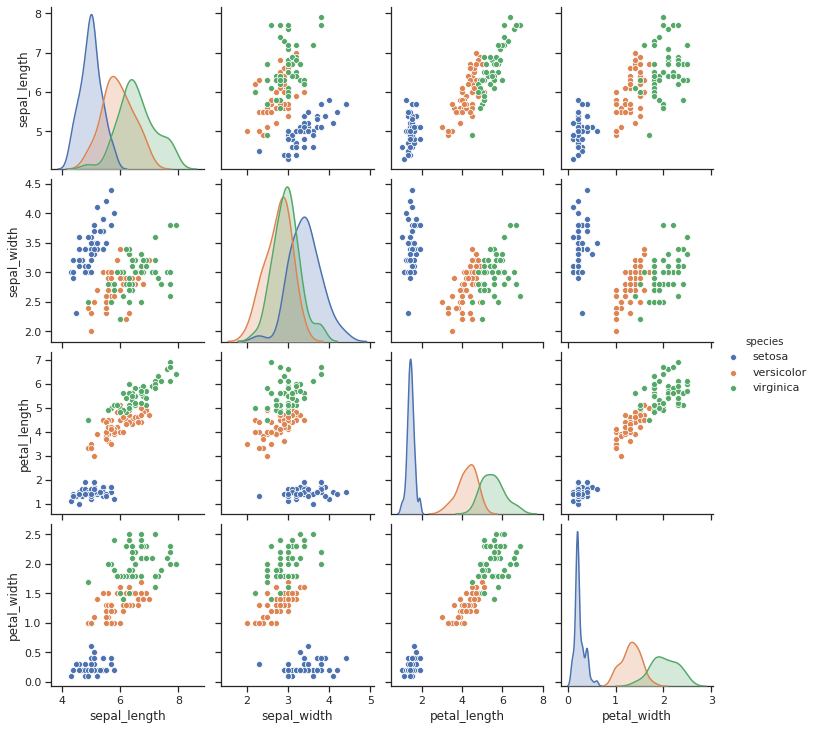

In [0]:
ax = sns.pairplot(data, hue='species')

In [0]:
labels = {'setosa':0, 'versicolor':1, 'virginica':2}
data['species'] = data['species'].map(labels)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train[['species']]
X_test = test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test[['species']]
y_train.head()

,species
26,0
148,2
128,2
125,2
10,0


In [0]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,0
148,6.2,3.4,5.4,2.3,2
128,6.4,2.8,5.6,2.1,2
125,7.2,3.2,6.0,1.8,2
10,5.4,3.7,1.5,0.2,0


In [0]:
from sklearn.preprocessing import StandardScaler

scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [0]:
NB_mod = GaussianNB()
NB_mod.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
X_test = scale.transform(X_test)
y_test_predict = NB_mod.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_test, y_test_predict)

0.9666666666666667

In [0]:
result = pd.concat([test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].reset_index().drop('index',axis=1),
                    y_test.rename(columns={'species': 'test'}).reset_index().drop('index',axis=1),
                    pd.DataFrame(np.vectorize({0: "o", 1: "s", 2: "+"}.get)(y_test_predict), columns=['predict']).reset_index().drop('index',axis=1)],
                   axis=1)
result.head()

,sepal_length,sepal_width,petal_length,petal_width,test,predict
0,6.4,2.7,5.3,1.9,2,+
1,7.7,3.0,6.1,2.3,2,+
2,4.4,3.2,1.3,0.2,0,o
3,6.4,2.9,4.3,1.3,1,s
4,6.3,2.7,4.9,1.8,2,+


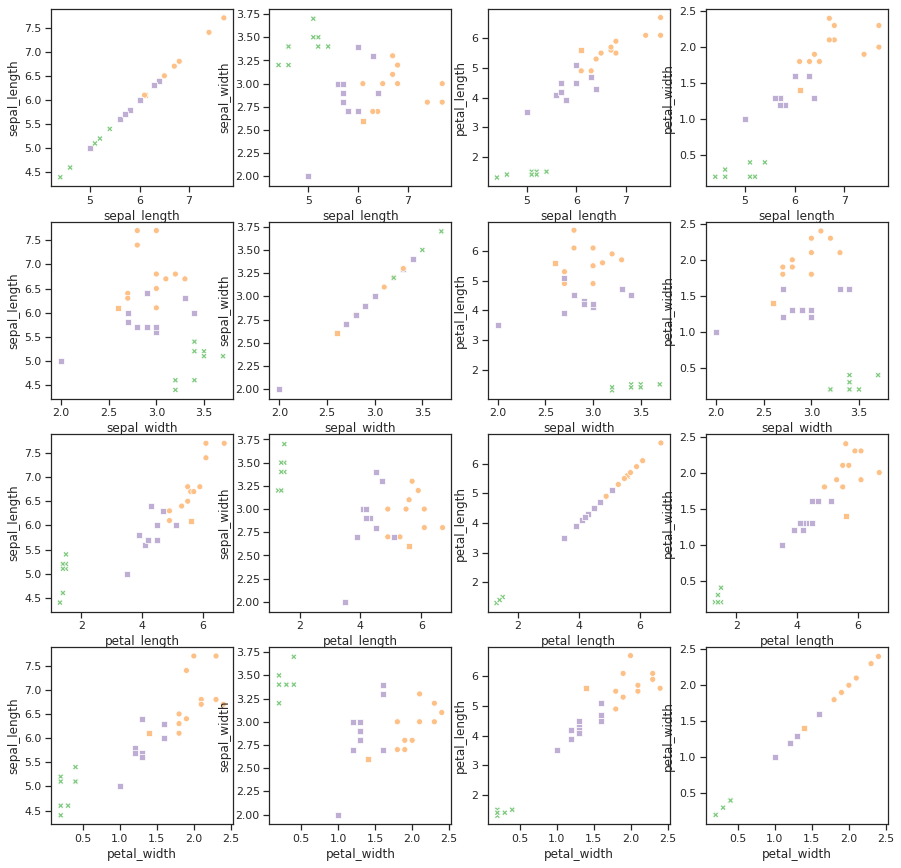

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(15,15))
x = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i, q in enumerate(x):
    for j, w in enumerate(x):
        sns.scatterplot(q, w, data=result, hue='test', style='predict', palette="Accent", ax=ax[i,j], legend=False)
plt.show()

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/hothienlac/CS433/master/Naive_Bayes_Lab/Credit_Dataset.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,Class
0,-1.864869,-0.933901,0.918477,2.271006,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
1,1.708369,1.163046,-0.870183,-1.446152,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
2,-0.673790,-0.181559,-0.870183,1.226696,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,1.478913,1.525148,-0.870183,0.942455,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0
4,0.517289,0.904743,0.024147,1.488620,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1


In [0]:
FeatureList = data.columns[:-1]
Features = data[FeatureList]
Labels = data["Class"]

In [0]:
X = Features
y = Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
NB_credit = GaussianNB()
NB_credit.fit(X_train,y_train)
y_pred = NB_credit.predict(X_test)
accuracy_score(y_test, y_pred)

0.745